In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv('data/train.csv')
census = pd.read_csv('data/census_starter.csv')

In [3]:
data.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [4]:
# first_day_of_month to datetime
#  = pd.to_datetime(data['first_day_of_month'])
data['first_day_of_month'] = pd.to_datetime(data['first_day_of_month'])
data['year'] = data['first_day_of_month'].dt.year
data['month'] = data['first_day_of_month'].dt.month
data['day'] = data['first_day_of_month'].dt.day

# drop first_day_of_month
data = data.drop('first_day_of_month', axis=1)

In [5]:
data.dtypes

row_id                    object
cfips                      int64
county                    object
state                     object
microbusiness_density    float64
active                     int64
year                       int64
month                      int64
day                        int64
dtype: object

In [6]:
census['cfips'].head(10)

0    1001
1    1003
2    1005
3    1007
4    1009
5    1011
6    1013
7    1015
8    1017
9    1019
Name: cfips, dtype: int64

In [7]:
df = pd.merge(data, census, on='cfips')

In [8]:
df.head()

,row_id,cfips,county,state,microbusiness_density,active,year,month,day,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,3.007682,1249,2019,8,1,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2.884870,1198,2019,9,1,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,3.055843,1269,2019,10,1,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2.993233,1243,2019,11,1,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2.993233,1243,2019,12,1,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [9]:
len(df)

122265

In [10]:
df.isna().sum()

row_id                    0
cfips                     0
county                    0
state                     0
microbusiness_density     0
active                    0
year                      0
month                     0
day                       0
pct_bb_2017               0
pct_bb_2018               0
pct_bb_2019               0
pct_bb_2020               0
pct_bb_2021               0
pct_college_2017          0
pct_college_2018          0
pct_college_2019          0
pct_college_2020          0
pct_college_2021          0
pct_foreign_born_2017     0
pct_foreign_born_2018     0
pct_foreign_born_2019     0
pct_foreign_born_2020     0
pct_foreign_born_2021     0
pct_it_workers_2017       0
pct_it_workers_2018      39
pct_it_workers_2019       0
pct_it_workers_2020       0
pct_it_workers_2021       0
median_hh_inc_2017        0
median_hh_inc_2018       39
median_hh_inc_2019        0
median_hh_inc_2020       39
median_hh_inc_2021       39
dtype: int64

In [11]:
# fill missing values of pct_it_workers_2018 with the mean
df['pct_it_workers_2018'].fillna(df['pct_it_workers_2018'].mean(), inplace=True)

In [12]:
# fill missing values of median_hh_inc_2018, median_hh_inc_2020, median_hh_inc_2021 with median
df['median_hh_inc_2018'].fillna(df['median_hh_inc_2018'].median(), inplace=True)
df['median_hh_inc_2020'].fillna(df['median_hh_inc_2020'].median(), inplace=True)
df['median_hh_inc_2021'].fillna(df['median_hh_inc_2021'].median(), inplace=True)

In [13]:
# correlation matrix
corr = df.corr()

In [14]:
# sort the correlation matrix by the target variable
corr['microbusiness_density'].sort_values(ascending=False)

microbusiness_density    1.000000
pct_college_2021         0.484153
pct_college_2019         0.482557
pct_college_2018         0.481764
pct_college_2017         0.480409
pct_college_2020         0.476635
median_hh_inc_2021       0.394345
pct_bb_2017              0.393485
median_hh_inc_2020       0.391271
pct_bb_2018              0.383592
median_hh_inc_2019       0.383006
median_hh_inc_2018       0.373871
pct_bb_2019              0.371221
median_hh_inc_2017       0.365038
pct_bb_2020              0.355352
pct_bb_2021              0.349566
active                   0.316981
pct_foreign_born_2020    0.284484
pct_foreign_born_2021    0.280956
pct_foreign_born_2018    0.276318
pct_foreign_born_2019    0.275900
pct_foreign_born_2017    0.272928
pct_it_workers_2018      0.259179
pct_it_workers_2017      0.252017
pct_it_workers_2020      0.249607
pct_it_workers_2019      0.246404
pct_it_workers_2021      0.241921
year                     0.017025
month                    0.002121
cfips         

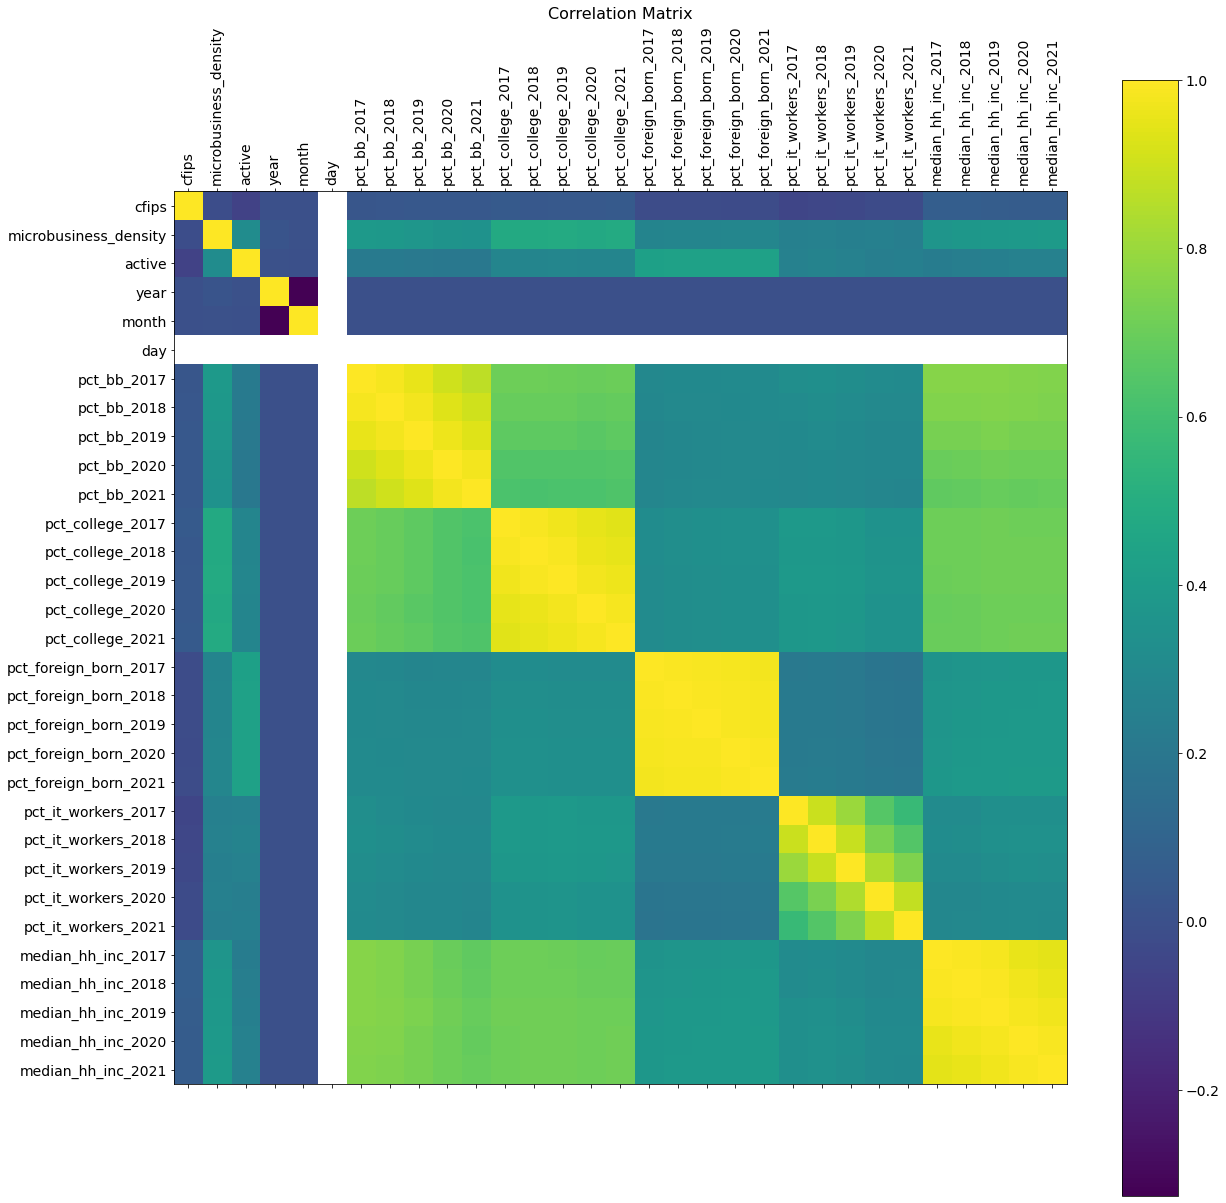

In [15]:
#plot the correlation matrix
plt.figure(figsize=(20,20))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=14, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [16]:
# drop data whose correation is less than .32

new_df = df.drop(corr[corr['microbusiness_density'] < .32].index, axis=1)

In [17]:
new_df.dtypes

row_id                    object
county                    object
state                     object
microbusiness_density    float64
day                        int64
pct_bb_2017              float64
pct_bb_2018              float64
pct_bb_2019              float64
pct_bb_2020              float64
pct_bb_2021              float64
pct_college_2017         float64
pct_college_2018         float64
pct_college_2019         float64
pct_college_2020         float64
pct_college_2021         float64
median_hh_inc_2017         int64
median_hh_inc_2018       float64
median_hh_inc_2019         int64
median_hh_inc_2020       float64
median_hh_inc_2021       float64
dtype: object

In [18]:
# split data to X and y
X = new_df.drop(['microbusiness_density','row_id'], axis=1)
y = new_df['microbusiness_density']

In [19]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# encode categorical variables
from sklearn.preprocessing import OneHotEncoder

def encode_data(input_df, stage):
    cat_cols = input_df.select_dtypes(include=['object']).columns
    if stage == 'train':
        enc = OneHotEncoder(handle_unknown='ignore')
        enc.fit(input_df[cat_cols])
        joblib.dump(enc, 'cache/enc.joblib')
    else:
        enc = joblib.load('cache/enc.joblib')
    encoded_data = enc.transform(input_df[cat_cols])
    encoder_df = pd.DataFrame(encoded_data.toarray(), columns=enc.get_feature_names_out(cat_cols),index=input_df.index)
    input_df = pd.concat([input_df, encoder_df], axis=1)
    input_df.drop(cat_cols, axis=1, inplace=True)
    return input_df

In [21]:
X_train = encode_data(X_train, 'train')

In [22]:
X_test = encode_data(X_test, 'test')

In [23]:
# scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

def scale_data(input_df, stage):
    num_cols = input_df.select_dtypes(include=['int64','float64']).columns
    if stage == 'train':
        scaler = StandardScaler()
        scaler.fit(input_df[num_cols])
        joblib.dump(scaler, 'cache/scaler.joblib')
    else:
        scaler = joblib.load('cache/scaler.joblib')
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    return input_df

In [24]:
X_train = scale_data(X_train, 'train')

In [25]:
X_test = scale_data(X_test, 'test')

In [26]:
# train a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# report performance
def report_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('R2: ', r2)


lr = LinearRegression()
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
print('Training score: ', train_score)

lr_pred = lr.predict(X_test)

test_score = lr.score(X_test, y_test)
print('Testing score: ', test_score)


report_performance(y_test, lr_pred)

Training score:  0.5965423138198964
Testing score:  0.6300866720571907
MSE:  8.187103756362843
RMSE:  2.8613115447925
MAE:  0.8919770668177873
R2:  0.6300866720571907
